# Candidate Placement**

## Step 1: Data Question

#### Will the candidate be placed and if yes how long will it take for them to get placed?


** many of the output have been hided, please remove the ; to view that output if you want to see the output<br>
** Data source: private unit publish with consent

## Step 2: Get and Clean Data

In [1]:
import pandas as pd

In [2]:
import numpy as np
work = pd.read_excel("Data_Pathrise.xlsx") # data source private xlsx file

In [3]:
work.head();

In [4]:
work.describe().T #basic details of data

,count,mean,std,min,25%,50%,75%,max
id,2544.0,1272.500000,734.533866,1.0,636.75,1272.5,1908.25,2544.0
program_duration_days,1928.0,136.098548,125.860248,0.0,14.00,112.0,224.00,548.0
placed,2544.0,0.375786,0.484420,0.0,0.00,0.0,1.00,1.0
number_of_interviews,2326.0,2.182287,2.959273,0.0,0.00,1.0,3.00,20.0
number_of_applications,2544.0,36.500786,53.654896,0.0,9.00,20.0,45.00,1000.0


In [5]:
work.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2544 entries, 0 to 2543
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           2544 non-null   int64  
 1   pathrise_status              2544 non-null   object 
 2   primary_track                2544 non-null   object 
 3   cohort_tag                   2536 non-null   object 
 4   program_duration_days        1928 non-null   float64
 5   placed                       2544 non-null   int64  
 6   employment_status            2315 non-null   object 
 7   highest_level_of_education   2486 non-null   object 
 8   length_of_job_search         2470 non-null   object 
 9   biggest_challenge_in_search  2520 non-null   object 
 10  professional_experience      2322 non-null   object 
 11  work_authorization_status    2260 non-null   object 
 12  number_of_interviews         2326 non-null   float64
 13  number_of_applicat

In [6]:
work.describe(include=['object']).T

,count,unique,top,freq
pathrise_status,2544,9,Placed,956
primary_track,2544,6,SWE,1678
cohort_tag,2536,47,JAN19A,132
employment_status,2315,5,Student,775
highest_level_of_education,2486,7,Bachelor's Degree,1361
length_of_job_search,2470,5,Less than one month,815
biggest_challenge_in_search,2520,10,Hearing back on my applications,1002
professional_experience,2322,4,1-2 years,882
work_authorization_status,2260,9,Citizen,1104
gender,2052,4,Male,1492


In [7]:
work.columns;

In [8]:
work = work.rename(columns={'employment_status ':"employment_status"}) #renaming

In [9]:
work.columns;

#### Categorising data later used in Step 4 for technique apply

In [10]:
work['status'] = work['status'].astype("category")

In [11]:
work['status_enc'] = work["status"].cat.codes

In [12]:
work['primary_track'] = work['primary_track'].astype("category")
work['cohort_tag'] = work['cohort_tag'].astype("category")
work['highest_level_of_education'] = work['highest_level_of_education'].astype("category")
work['biggest_challenge_in_search'] = work['biggest_challenge_in_search'].astype("category")
work['professional_experience'] = work['professional_experience'].astype("category")
work['work_authorization_status'] = work['work_authorization_status'].astype("category")
work['race'] = work['race'].astype("category")
work['gender'] = work['gender'].astype("category")

In [13]:
work['primary_track_enc'] = work['primary_track'].cat.codes
work['cohort_tag_enc'] = work['cohort_tag'].cat.codes
work['highest_level_of_education_enc'] = work['highest_level_of_education'].cat.codes
work['biggest_challenge_in_search_enc'] = work['biggest_challenge_in_search'].cat.codes
work['professional_experience_enc'] = work['professional_experience'].cat.codes
work['work_authorization_status_enc'] = work['work_authorization_status'].cat.codes
work['race_enc'] = work['race'].cat.codes
work['gender_enc'] = work['gender'].cat.codes

In [14]:
work.loc[work["number_of_interviews"] < 10.0, "number_of_interviews"] = 0
work.loc[work["number_of_interviews"] >= 10.0, "number_of_interviews"] = 1
work.loc[(work["number_of_interviews"].isnull()) , "number_of_interviews"] = 2

In [15]:
work.loc[work["number_of_applications"] <= 10, "number_of_applications"] = 0
work.loc[(work["number_of_applications"] <= 20) & (work["number_of_applications"] >10), "number_of_applications"] = 1
work.loc[(work["number_of_applications"] <= 30) & (work["number_of_applications"] >20) , "number_of_applications"] = 2
work.loc[work["number_of_applications"] > 30, "number_of_applications"] = 3

In [16]:
work.loc[work["program_duration_days"] <= 30, "program_duration_days"] = 0
work.loc[(work["program_duration_days"] <= 90) & (work["program_duration_days"] >30), "program_duration_days"] = 1
work.loc[(work["program_duration_days"].isnull()) , "program_duration_days"] = 2
work.loc[work["program_duration_days"] > 90, "program_duration_days"] = 3

In [17]:
work.drop_duplicates(subset = ["status"]);

In [18]:
work.drop_duplicates(subset = ["primary_track"]);

In [19]:
work.drop_duplicates(subset = ["highest_level_of_education"]);

In [20]:
work.drop_duplicates(subset = ["biggest_challenge_in_search"]);

In [21]:
work.drop_duplicates(subset = ["professional_experience"])[["professional_experience","professional_experience_enc"]];

In [22]:
work.drop_duplicates(subset = ["work_authorization_status"])["work_authorization_status"];

In [23]:
work.drop_duplicates(subset = ["race"]);

In [24]:
work.drop_duplicates(subset = ["gender"])["gender"];

#### Categories

##### status 
active 0 <br>
closed lost 2 <br>
placed 5<br>
withdrawn (failed) 7<br>
withdrawn (trial) 8<br>
withdrawn 6<br>
defered 3<br>
break 1<br>
mia 4<br>

##### track
swe 4<br>
pso 3<br>
design 1<br>
data 0<br>
web 5<br>
marketing 2<br>

##### education
Bachelor's Degree 0<br>
Some College, No Degree 5<br>
Master's Degree 4<br>
NaN -1<br>
Doctorate or Professional Degree 1<br>
High School Graduate 3<br>
GED or equivalent 2<br>
Some High School 6<br>

##### biggest challenge
Hearing back on my applications 5<br>
Getting past final round interviews 2<br>
Figuring out which jobs to apply for 1<br>
Technical interviewing 8<br>
Getting past phone screens 4<br>
Lack of relevant experience 6<br>
Technical skills 9<br>
Getting past mid-stage interviews 3<br>
Behavioral interviewing 0<br>
Resume gap 7<br>
NaN -1<br>

##### professional
3-4 years 1<br>
1-2 years 0<br>
Less than one year 3<br>
5+ years 2<br>
NaN -1<br>

###### work
Canada Citizen 0<br>
Citizen 1<br>
F1 Visa/OPT 3<br>
Green Card 4<br>
F1 Visa/CPT 2<br>
Other 7<br>
NaN -1<br>
STEM OPT 8<br>
Not Authorized 6<br>
H1B 5<br>

##### race
white 6<br>
east asian 2<br>
devline to identify 1<br>
black 0<br>
latino 3<br>
middle eastern 4<br>
south asian 7<br>
two or more 8<br>
native american 5<br>
nan -1<br>

##### gender
male 2<br>
female 1<br>
NaN -1<br>
decline to identify 0<br>
non-binary 3<br>

##### interview
less than 10.0 0<br>
greater than equal 10.0 1<br>
null 2<br>

##### application
Less than equal to 10 0<br>
Greater than 10 less than equal 20 1<br>
greater than 20 less than Equal 30 2<br>
Greater than 30 3<br>

##### program duration days
less than equal 30 0<br>
greater than 30 less than equal to 90 1<br>
null 2<br>
greater than 90 3<br>

##### placed
not placed 0<br>
placed 1<br>

In [25]:
## New dataframe with just cateogrised data as keyed in the above key-pair.
work_enc = work[["id","status_enc", "primary_track_enc", "cohort_tag_enc", "program_duration_days", 
                                   "highest_level_of_education_enc", "biggest_challenge_in_search_enc", "professional_experience_enc",
                                   "work_authorization_status_enc", "race_enc", "gender_enc", "number_of_interviews", "number_of_applications", "placed"]]

In [26]:
## convert back from categories to objects

In [27]:
work["status"] = work["status"].astype("object") 

In [28]:
work["status"].dtype;

In [29]:
work_enc["program_duration_days"][0];

In [30]:
work['primary_track'] = work['primary_track'].astype("object")
work['cohort_tag'] = work['cohort_tag'].astype("object")
work['highest_level_of_education'] = work['highest_level_of_education'].astype("object")
work['biggest_challenge_in_search'] = work['biggest_challenge_in_search'].astype("object")
work['professional_experience'] = work['professional_experience'].astype("object")
work['work_authorization_status'] = work['work_authorization_status'].astype("object")
work['race'] = work['race'].astype("object")
work['gender'] = work['gender'].astype("object")

In [31]:
work_enc

,id,pathrise_status_enc,primary_track_enc,cohort_tag_enc,program_duration_days,highest_level_of_education_enc,biggest_challenge_in_search_enc,professional_experience_enc,work_authorization_status_enc,race_enc,gender_enc,number_of_interviews,number_of_applications,placed
0,1,0,4,39,2.0,0,5,1,0,6,2,0.0,3,0
1,2,0,3,20,2.0,5,2,0,1,6,2,0.0,0,0
2,3,2,1,7,0.0,4,1,3,1,2,2,0.0,0,0
3,4,2,3,7,0.0,0,2,3,1,1,2,0.0,2,0
4,5,5,4,6,1.0,0,5,0,3,2,2,1.0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2539,2540,7,1,24,3.0,4,8,2,1,6,2,0.0,1,0
2540,2541,7,0,19,3.0,4,5,0,3,6,2,0.0,0,0
2541,2542,0,4,44,2.0,0,8,0,1,6,1,0.0,2,0
2542,2543,0,4,31,2.0,4,8,0,1,1,2,0.0,0,0


In [32]:
work

,id,pathrise_status,primary_track,cohort_tag,program_duration_days,placed,employment_status,highest_level_of_education,length_of_job_search,biggest_challenge_in_search,...,race,pathrise_status_enc,primary_track_enc,cohort_tag_enc,highest_level_of_education_enc,biggest_challenge_in_search_enc,professional_experience_enc,work_authorization_status_enc,race_enc,gender_enc
0,1,Active,SWE,OCT19A,2.0,0,Unemployed,Bachelor's Degree,3-5 months,Hearing back on my applications,...,Non-Hispanic White or Euro-American,0,4,39,0,5,1,0,6,2
1,2,Active,PSO,JAN20A,2.0,0,Unemployed,"Some College, No Degree",3-5 months,Getting past final round interviews,...,Non-Hispanic White or Euro-American,0,3,20,5,2,0,1,6,2
2,3,Closed Lost,Design,AUG19B,0.0,0,Employed Part-Time,Master's Degree,Less than one month,Figuring out which jobs to apply for,...,East Asian or Asian American,2,1,7,4,1,3,1,2,2
3,4,Closed Lost,PSO,AUG19B,0.0,0,Contractor,Bachelor's Degree,Less than one month,Getting past final round interviews,...,Decline to Self Identify,2,3,7,0,2,3,1,1,2
4,5,Placed,SWE,AUG19A,1.0,1,Unemployed,Bachelor's Degree,1-2 months,Hearing back on my applications,...,East Asian or Asian American,5,4,6,0,5,0,3,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2539,2540,Withdrawn (Failed),Design,JUN18A,3.0,0,Contractor,Master's Degree,6 months to a year,Technical interviewing,...,Non-Hispanic White or Euro-American,7,1,24,4,8,2,1,6,2
2540,2541,Withdrawn (Failed),Data,JAN19B,3.0,0,NaN,Master's Degree,3-5 months,Hearing back on my applications,...,Non-Hispanic White or Euro-American,7,0,19,4,5,0,3,6,2
2541,2542,Active,SWE,SEP18C,2.0,0,Contractor,Bachelor's Degree,Less than one month,Technical interviewing,...,Non-Hispanic White or Euro-American,0,4,44,0,8,0,1,6,1
2542,2543,Active,SWE,MAY18A,2.0,0,NaN,Master's Degree,Less than one month,Technical interviewing,...,Decline to Self Identify,0,4,31,4,8,0,1,1,2


In [33]:
## Making the new dataframe more uniform and keeping it according for the technique.

In [34]:
work_enc = work_enc.drop(["cohort_tag_enc"], axis = 1)

In [35]:
work_enc['program_duration_days'] = work['program_duration_days'].astype("int")

In [36]:
work_enc['number_of_interviews'] = work['number_of_interviews'].astype("int")

In [37]:
work_enc.round(2)

,id,pathrise_status_enc,primary_track_enc,program_duration_days,highest_level_of_education_enc,biggest_challenge_in_search_enc,professional_experience_enc,work_authorization_status_enc,race_enc,gender_enc,number_of_interviews,number_of_applications,placed
0,1,0,4,2,0,5,1,0,6,2,0,3,0
1,2,0,3,2,5,2,0,1,6,2,0,0,0
2,3,2,1,0,4,1,3,1,2,2,0,0,0
3,4,2,3,0,0,2,3,1,1,2,0,2,0
4,5,5,4,1,0,5,0,3,2,2,1,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2539,2540,7,1,3,4,8,2,1,6,2,0,1,0
2540,2541,7,0,3,4,5,0,3,6,2,0,0,0
2541,2542,0,4,2,0,8,0,1,6,1,0,2,0
2542,2543,0,4,2,4,8,0,1,1,2,0,0,0


In [38]:
work_enc.describe().T

,count,mean,std,min,25%,50%,75%,max
id,2544.0,1272.500000,734.533866,1.0,636.75,1272.5,1908.25,2544.0
pathrise_status_enc,2544.0,4.188679,2.598695,0.0,2.00,5.0,6.00,8.0
primary_track_enc,2544.0,3.144654,1.407073,0.0,3.00,4.0,4.00,5.0
program_duration_days,2544.0,1.852594,1.191417,0.0,1.00,2.0,3.00,3.0
highest_level_of_education_enc,2544.0,1.634041,2.029113,-1.0,0.00,0.0,4.00,6.0
biggest_challenge_in_search_enc,2544.0,4.466981,2.157869,-1.0,3.00,5.0,5.00,9.0
professional_experience_enc,2544.0,1.068396,1.329377,-1.0,0.00,1.0,2.00,3.0
work_authorization_status_enc,2544.0,1.911950,1.849666,-1.0,1.00,1.0,3.00,8.0
race_enc,2544.0,4.152123,2.464704,-1.0,2.00,4.0,6.00,8.0
gender_enc,2544.0,1.198113,1.156314,-1.0,1.00,2.0,2.00,3.0


## Step 3: EDA

In [39]:
import matplotlib.pyplot as plt 

In [40]:
graph_status = work_enc.groupby(["status_enc"]).count().reset_index()

In [41]:
graph_status1 = work.groupby(["status"]).count().reset_index()

In [42]:
graph_placed = work_enc.groupby(["placed"]).count().reset_index()

In [43]:
graph_placedauth = work_enc.groupby(["placed", "work_authorization_status_enc"]).count().reset_index()

In [44]:
graph_placedinter = work_enc.groupby(["placed", "number_of_interviews"]).count().reset_index()

Text(0, 0.5, 'Number')

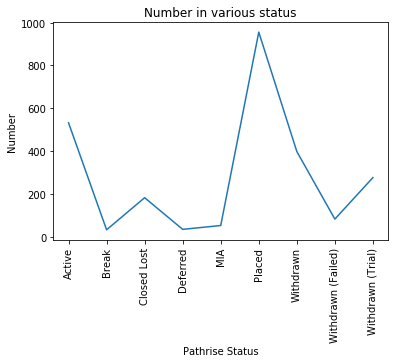

In [45]:
ax1= graph_status1.plot(x = "status", y = "id", kind ="line", title = "Number in various status", rot =90, legend = False)
ax1.set_xlabel("Status")
ax1.set_ylabel("Number")

The above graph shows the counts for each category under status. We see that 5 (placed) is one of the highest numbers within the other categories and 1 (break) is one of the lowest.

[Text(0, 0, 'Not Placed'), Text(0, 0, 'Placed')]

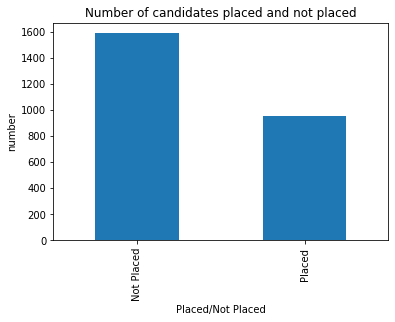

In [46]:
ax = graph_placed.plot(x = "placed", y = "id", kind="bar", title= "Number of candidates placed and not placed", legend = False)
ax.set_xlabel("Placed/Not Placed")
ax.set_ylabel("number")
ax.set_xticklabels(["Not Placed", "Placed"])

The above graph shows a simple plot of number of candidates placed and not placed. Not placed being higher that may be due to people withdrawing within the first 2 weeks.

In [47]:
line = pd.DataFrame({'placed':1, 'work_authorization_status_enc':6, 'id':0}, index=[16.5])

In [48]:
graph_placedauth = graph_placedauth.append(line, ignore_index=False)


In [49]:
graph_placedauth = graph_placedauth.sort_index().reset_index(drop=True)


In [50]:
graph_placedauth = graph_placedauth.reindex(['placed', 'work_authorization_status_enc', 'id'], axis=1)


In [51]:
graph_placedauth;

In [52]:
graph_placedinter;

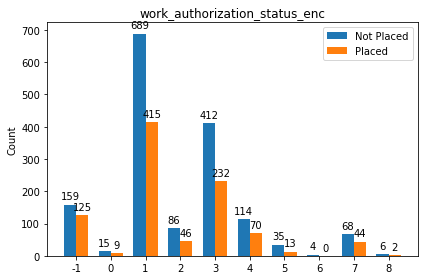

In [53]:
labels = graph_placedauth["work_authorization_status_enc"][0:10]
not_placed = graph_placedauth["id"][0:10]
placed = graph_placedauth["id"][10:20]
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, not_placed, width, label='Not Placed')
rects2 = ax.bar(x + width/2, placed, width, label='Placed')

ax.set_ylabel('Count')
ax.set_title('work_authorization_status_enc')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

The above graph shows the work authorisation counts under each category of work authorisation and show the divid between placed and not placed. 1 (Citizens) being the most placed and most not placed numbers. With the lowest amount being placed is 0 for unauthorised.

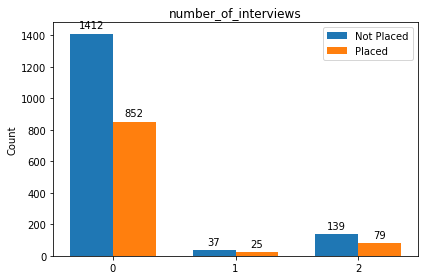

In [54]:
labels = graph_placedinter["number_of_interviews"][0:3]
not_placed = graph_placedinter["id"][0:3]
placed = graph_placedinter["id"][3:6]
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, not_placed, width, label='Not Placed')
rects2 = ax.bar(x + width/2, placed, width, label='Placed')

ax.set_ylabel('Count')
ax.set_title('number_of_interviews')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

The above graph shows that number under each category of number of interviews with a split of placed and not placed. With if a candidate has more than equal to 10 interviews the amounts placed and not places are really close while with less than 10 interviews the amount not placed are staggerinly high.

In [55]:
work_enc.groupby(["placed", "status_enc"]).mean();

In [56]:
work_enc.groupby(["placed", "primary_track_enc"]).mean();

In [57]:
work_enc.groupby(["placed", "race_enc"]).mean();

In [58]:
work_enc.groupby(["placed", "gender_enc"]).mean();

In [59]:
work_enc;

In [60]:
work_enc.groupby(["placed", "status_enc"]).mean();

In [61]:
work_enc.groupby(["placed", "primary_track_enc"]).mean();

In [62]:
work_enc.groupby(["placed", "highest_level_of_education_enc"]).mean();

In [63]:
work_enc.groupby(["placed", "biggest_challenge_in_search_enc"]).mean();

In [64]:
work_enc.groupby(["placed", "professional_experience_enc"]).mean();

In [65]:
work_enc.groupby(["placed", "race_enc"]).mean();

In [66]:
work_enc.groupby(["placed", "gender_enc"]).mean();

In [67]:
work_enc.groupby(["placed", "program_duration_days"]).mean();

In [68]:
work_enc.groupby(["placed", "number_of_applications"]).mean();

In [69]:
work_enc.groupby(["placed", "work_authorization_status_enc"]).mean();

In [70]:
work_enc.groupby(["placed", "number_of_interviews"]).mean();

#### Basic details from the eda

##### Placed
###### The highest averge and lowest average (ignoring null values for each category) variable.
<pre>
status -                 placed <br>
track -                  marketing               least - swe<br>
education -              Some High School        least - ged<br>
biggest -                Resume gap              least - final round<br>
professional -           3-4                     least - 1-2<br>
race -                   decline to indentify    least - native american<br>
gender -                 non-binary              least - female<br> 
program -                l than eq 30            least - >30 l than eq 90<br>
number_of_applications - l than eq 30 g 20       least - >30<br>
work -                   Canada citizen          least - stem opt<br>
inter -                  l than eq  10.0         least - g than eq 10<br>

----------------------------------------------------
##### not placed
###### The highest average variable (ignoring null values) for categories.

status -                 defered <br>
track -                  swe<br>
education -              Some High School<br>
biggest -                Technical interviewing<br>
professional -           5+ years<br>
race -                   middle eastern<br>
gender -                 male<br>
program -                l than eq 30<br>
number_of_applications - l than eq 30 g 20<br>
work -                   Other<br>
inter -                  l 10.0<br>

</pre>

In [71]:
work['status'].unique();

In [72]:
work.loc[work["status"].isin(["Withdrawn", 'Withdrawn (Failed)','Withdrawn (Trial)' ])]
work.shape
756/2544
work.loc[work["status"].isin(['Withdrawn (Trial)' ])]
276/2544
276/756
work.loc[work["status"].isin(['Placed'])]
956/ (2544 - 756)
work.loc[work["status"].isin(['Placed', 'Active'])]
1488/(2544-756);

In [73]:
work.groupby(['program_duration_days']).mean();

In [74]:
### feature changing to see the change in techniques

In [75]:
#withdr = ("Withdrawn").astype(object)
#work['status'] = work['status'].astype(str).replace({'Withdrawn (Failed)': 'Withdrawn', 'Withdrawn (Trial)': 'Withdrawn'})
#work['highest_level_of_education'] = work['highest_level_of_education'].astype(str).replace({'High School Graduate': "High School", 'Some High School': "High School" })

In [76]:
work['status'].unique();

In [77]:
work_enc= work_enc.drop(["id"], axis = 1)

In [78]:
work_enc

,pathrise_status_enc,primary_track_enc,program_duration_days,highest_level_of_education_enc,biggest_challenge_in_search_enc,professional_experience_enc,work_authorization_status_enc,race_enc,gender_enc,number_of_interviews,number_of_applications,placed
0,0,4,2,0,5,1,0,6,2,0,3,0
1,0,3,2,5,2,0,1,6,2,0,0,0
2,2,1,0,4,1,3,1,2,2,0,0,0
3,2,3,0,0,2,3,1,1,2,0,2,0
4,5,4,1,0,5,0,3,2,2,1,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...
2539,7,1,3,4,8,2,1,6,2,0,1,0
2540,7,0,3,4,5,0,3,6,2,0,0,0
2541,0,4,2,0,8,0,1,6,1,0,2,0
2542,0,4,2,4,8,0,1,1,2,0,0,0


## Step 4: Apply Technique

In [79]:
work_enc_long = work_enc[["status_enc", "primary_track_enc", 
                                   "highest_level_of_education_enc", "biggest_challenge_in_search_enc", "professional_experience_enc",
                                   "work_authorization_status_enc", "race_enc", "gender_enc", "number_of_interviews", "number_of_applications", "placed", "program_duration_days"]]

In [80]:
work_enc_long;

In [81]:
#work_enc = work_enc.drop(["status_enc"], axis =1)
work_encarray = np.asarray(work_enc)

In [82]:
work_encarray

array([[0, 4, 2, ..., 0, 3, 0],
       [0, 3, 2, ..., 0, 0, 0],
       [2, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 4, 2, ..., 0, 2, 0],
       [0, 4, 2, ..., 0, 0, 0],
       [6, 4, 3, ..., 0, 3, 0]])

In [83]:
x = work_encarray[:,0:11]
y = work_encarray[:,11:12]

In [84]:
x.size

27984

In [85]:
y.size

2544

In [86]:
x

array([[0, 4, 2, ..., 2, 0, 3],
       [0, 3, 2, ..., 2, 0, 0],
       [2, 1, 0, ..., 2, 0, 0],
       ...,
       [0, 4, 2, ..., 1, 0, 2],
       [0, 4, 2, ..., 2, 0, 0],
       [6, 4, 3, ..., 2, 0, 3]])

In [87]:
y

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [88]:
np.shape(x)

(2544, 11)

In [89]:
np.shape(y)

(2544, 1)

In [90]:
work_enc_longarray = np.asarray(work_enc_long)
work_enc_longarray
x1 = work_enc_longarray[:,0:11]
y1 = work_enc_longarray[:,11:12]
np.shape(x1)
np.shape(y1)

(2544, 1)

### Logistic Regression

### placement

In [91]:
from sklearn.model_selection import train_test_split
import sklearn
from sklearn.linear_model import LogisticRegression

In [92]:
test_sizes = 0.20
seed = 0
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = test_sizes, random_state =seed)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(2035, 11)
(509, 11)
(2035, 1)
(509, 1)


In [93]:
model = LogisticRegression()

In [94]:
a = model.fit(X_train, Y_train)
a

/Users/hetsvi/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [95]:
predictions = model.predict(X_test)

In [96]:
predictions

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0,

In [97]:
print(X_train)

[[5 4 3 ... 1 0 2]
 [5 1 3 ... 1 0 0]
 [5 4 3 ... 1 0 0]
 ...
 [5 4 1 ... 1 0 1]
 [8 4 0 ... 2 0 0]
 [2 0 0 ... 1 0 1]]


In [98]:
print(X_test)
print(a.score(X_test, Y_test))

[[ 6  4  0 ... -1  2  0]
 [ 2  4  0 ...  2  0  0]
 [ 5  4  3 ...  2  0  3]
 ...
 [ 6  3  0 ... -1  0  3]
 [ 5  4  3 ... -1  0  3]
 [ 5  4  3 ...  2  0  3]]
0.7387033398821218


In [99]:
from sklearn.metrics import confusion_matrix
confusion_matrixx = confusion_matrix(Y_test, predictions)
print(confusion_matrixx
     
     )

[[262  67]
 [ 66 114]]


In [100]:
# 262+114 correct, 67+66 incorrect

In [101]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, predictions))

              precision    recall  f1-score   support

           0       0.80      0.80      0.80       329
           1       0.63      0.63      0.63       180

    accuracy                           0.74       509
   macro avg       0.71      0.71      0.71       509
weighted avg       0.74      0.74      0.74       509



In [102]:
fe = (work_enc[0:11].columns)
importance_feature = sorted(zip(fe, model.coef_[0]), key=lambda x:x[1], reverse=True)
for f, v in importance_feature:
    print(f, v)

program_duration_days 0.6298417909433656
pathrise_status_enc 0.23253357155598953
gender_enc 0.19760162453920277
professional_experience_enc 0.08766473837908476
primary_track_enc 0.08457066620884718
race_enc 0.026636579273193416
number_of_interviews 0.0051510819563251676
highest_level_of_education_enc -0.01334901108191046
number_of_applications -0.015108128702744859
work_authorization_status_enc -0.02378783499696138
biggest_challenge_in_search_enc -0.03241174266032425


### Program_Duration_date

In [103]:
test_sizes = 0.20
seed = 0
X_train1, X_test1, Y_train1, Y_test1 = train_test_split(x1, y1, test_size = test_sizes, random_state =seed)
print(X_train1.shape)
print(X_test1.shape)
print(Y_train1.shape)
print(Y_test1.shape)

model1 = LogisticRegression()
a1 = model1.fit(X_train1, Y_train1)
a1
predictions1 = model1.predict(X_test1)
predictions1
print(a1.score(X_test1, Y_test1))
confusion_matrixx1 = confusion_matrix(Y_test1, predictions1)
print(confusion_matrixx1)
print(classification_report(Y_test1, predictions1))

(2035, 11)
(509, 11)
(2035, 1)
(509, 1)
0.6286836935166994
[[ 45   0  35  42]
 [  8   0   0  32]
 [ 11   0 124   0]
 [ 61   0   0 151]]
              precision    recall  f1-score   support

           0       0.36      0.37      0.36       122
           1       0.00      0.00      0.00        40
           2       0.78      0.92      0.84       135
           3       0.67      0.71      0.69       212

    accuracy                           0.63       509
   macro avg       0.45      0.50      0.47       509
weighted avg       0.57      0.63      0.60       509



/Users/hetsvi/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/hetsvi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Users/hetsvi/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.

### Random Forest Classifier

### Placed or Not Placed

In [104]:
from sklearn.ensemble import RandomForestClassifier

In [105]:
modelfc = RandomForestClassifier(max_depth=2, random_state=0)

In [106]:
fitfc = modelfc.fit(X_train, Y_train)

/Users/hetsvi/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


In [107]:
predictionfc = fitfc.predict(X_test)

In [108]:
fitfc.score(X_test, Y_test)

0.9174852652259332

In [109]:
confusion_matrix(Y_test, predictionfc)

array([[329,   0],
       [ 42, 138]])

In [110]:
print(classification_report(Y_test, predictionfc))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94       329
           1       1.00      0.77      0.87       180

    accuracy                           0.92       509
   macro avg       0.94      0.88      0.90       509
weighted avg       0.93      0.92      0.91       509



pathrise_status_enc 0.48489966185466543
program_duration_days 0.2923250844293756
primary_track_enc 0.08801477289733031
professional_experience_enc 0.0510889633034032
gender_enc 0.019124173073045682
race_enc 0.017139426537677856
highest_level_of_education_enc 0.014248349573913452
work_authorization_status_enc 0.014237799857433906
biggest_challenge_in_search_enc 0.013918578780834787
number_of_applications 0.004687238417830173
number_of_interviews 0.00031595127448962187


Text(0.5, 0, 'Random Forest Classifier Importance features')

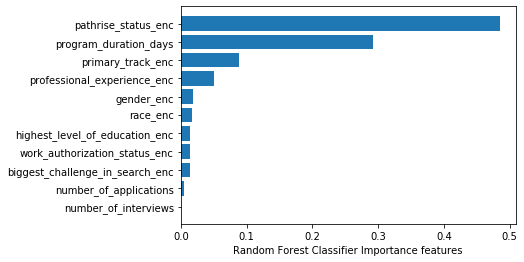

In [111]:
fe = (work_enc[0:11].columns)
importance_feature = sorted(zip(fe, modelfc.feature_importances_), key=lambda x:x[1], reverse=True)
for f, v in importance_feature:
    print(f, v)

sorted_idx = modelfc.feature_importances_.argsort()
plt.barh(fe[sorted_idx],modelfc.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Classifier Importance features")

### Program_Duration_date

In [113]:
modelfc1 = RandomForestClassifier(max_depth=4, random_state=0)
fitfc1 = modelfc1.fit(X_train1, Y_train1)
fitfc1
predictionsfc1 = modelfc1.predict(X_test1)
predictionsfc1
print(fitfc1.score(X_test1, Y_test1))
confusion_matrixxfc1 = confusion_matrix(Y_test1, predictionsfc1)
print(confusion_matrixxfc1)
print(classification_report(Y_test1, predictionsfc1))

/Users/hetsvi/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


0.8290766208251473
[[ 86   0   0  36]
 [  1   0   0  39]
 [  0   0 124  11]
 [  0   0   0 212]]
              precision    recall  f1-score   support

           0       0.99      0.70      0.82       122
           1       0.00      0.00      0.00        40
           2       1.00      0.92      0.96       135
           3       0.71      1.00      0.83       212

    accuracy                           0.83       509
   macro avg       0.67      0.66      0.65       509
weighted avg       0.80      0.83      0.80       509



/Users/hetsvi/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### New Data from out of the file to predict with the features if they'll be placed or not

In [114]:
new_data = [(0, 3, 2, 0, 6, 1, 0, 6, 1, 0, 2), (1, 3, 1, 0, 6, 1, 0, 5, 1, 0, 1)]

In [115]:
x[0]

array([0, 4, 2, 0, 5, 1, 0, 6, 2, 0, 3])

In [116]:
new_array = np.asarray(new_data)

In [117]:
labels =["not placed", "placed"]

#### Logistic Regression with 74%

In [118]:
new_predicts = model.predict(new_array)

In [119]:
for i in range(2):
    print(new_data[i], labels[int(new_predicts[i])])
    

(0, 3, 2, 0, 6, 1, 0, 6, 1, 0, 2) not placed
(1, 3, 1, 0, 6, 1, 0, 5, 1, 0, 1) not placed


In [120]:
new_predicts

array([0, 0])

#### Random Forest Classifier with 91%

In [121]:
new_predictfc = modelfc.predict(new_array)

In [122]:
for i in range(2):
    print(new_data[i], labels[int(new_predictfc[i])])

(0, 3, 2, 0, 6, 1, 0, 6, 1, 0, 2) not placed
(1, 3, 1, 0, 6, 1, 0, 5, 1, 0, 1) not placed


In [123]:
new_predictfc

array([0, 0])

### New Data from out of the file to predict with the features the program time

In [156]:
new_data1 = [(0, 3, 0, 5, 1, 0, 5, 2, 0, 3, 1), (0, 3, 0, 5, 1, 0, 6, 1, 0, 3, 2)]

In [157]:
x1[0];

In [158]:
new_array1 = np.asarray(new_data1)

In [159]:
labels1 =["less than equal 30", "31-90", "don't know (or active)", "greater than 90"]

#### Logisitic Regression

In [160]:
new_predicts1 = model1.predict(new_array1)
for i in range(2):
    print(new_data1[i], labels1[int(new_predicts1[i])])
new_predicts1

(0, 3, 0, 5, 1, 0, 5, 2, 0, 3, 1) don't know (or active)
(0, 3, 0, 5, 1, 0, 6, 1, 0, 3, 2) 31-90


array([2, 1])

#### Random Forest Classifier

In [161]:
new_predictfc1 = modelfc1.predict(new_array1)
for i in range(2):
    print(new_data1[i], labels1[int(new_predictfc1[i])])
new_predictfc1

(0, 3, 0, 5, 1, 0, 5, 2, 0, 3, 1) don't know (or active)
(0, 3, 0, 5, 1, 0, 6, 1, 0, 3, 2) don't know (or active)


array([2, 2])

## Step 5: Insights share

<pre>
Just to start, we shall see the various insights from withdrawl so that we can make a estimate as to when a person gets enrolled how likely are they going to withdaw that is an auto not placed.

The total withdrawn rates are 29% including trial and failure and other.
The percent withdrawn with the trail ending are 10%.
Out of the total withdrawn (trail, failure and other), percentage withdrawn in trail are 36%
out of the number of people not withdrawn the percentage places is - 53% (this excludes active)
out of the number of people not withdrawn the percentage places and is active - 83%
</pre>


###### Some insights for categories and areas

People with work authorisation not authorised are all enrolled and they don't get places so maybe focus on not enrolling people with no work authorisation.

<pe>Over all more people are placed with less than 10 interviews although as the interviews increase the gap between placed and not placed decreases. </pe>

Some features and groups that are great (higher averages) when being placed and are places are in marketing tracks, at least some high school education and enrolled in a high school (so no include ged), usually have issues relating to resume gaps and have alteast 3-4 years of experience, between 20-30 applications, with overall around 10 interviews are more likely to be placed.

Some features and groups that are great (higher averages) to show not placement are in defered status, SWE track (probably because the total amounts are more as well), struggle with technical interviewing, a lot of experience, and very few applications less than 10.

For the logistic classification model: program duration is an important feature while biggest challenges in searching doesn't weight as much. So, while researching manually focus more on average times it takes for people to be placed.

For random forest classfication model: status is an important feature and number of interviews isn't, so while manually focusing we can give more weight to percentages and proportions in status.

##### BUSINESS FOCUS
<br>
<pe>
> Knowing that marketing track does well, consider reaching out to more people with that track. <br>
> Don't enroll people with no work authorisation <br>
> Average interviews that are good is around 10 <br>
> Resume gap issues usually have success in place <br>
> Defer only people that need it a lot <br>
> People struggling with techical intervewing are less likely to be placed so focus more on their techincal skills. <br>
</pe>

-----------------------------------------------------------
Around 80% of the people that are enrolled in are going to be placed.
SWE track people normally get placed the most (higher average) in under or equal to 30 days.
Design track people normally get placed the most (higher average) 31-90 days.
Web track people normally get placed the most (higher average) in more than 90 days.

Overall with a higher average for less than equal to 30 days although it is overall equivalent for less than 30, 31-90 and more than 90 and null.
